# Work 5. Ethereum

### 0. Importing all the modules needed

In [1]:
from web3 import Web3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. Constants
#### DIV is needed for countinf fees & rewards
#### PRICE is the gasPrice which is always 3 000 000 000

In [2]:
DIV = 1000000000
PRICE = 2000000000

### 2. Connecting through Infura

In [60]:
web3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/d241a267309e4cbea42153ae8c80e79f'))

In [61]:
#Making sure the connection is estabilished
print(web3.isConnected())

True


### 3. Getting the blocks
#### Personal number: 44

In [64]:
blocks = []
last_block = 8961400 - 1000 * (44 - 2)
first_block = 8961400 - 1000 * (44 - 1)
print (first_block, last_block)

8918400 8919400


In [65]:
for current_block in range(first_block, last_block):
    c_block = web3.eth.getBlock(current_block, True)
    blocks.append(c_block)


#### Time taken: 6 m 13 sec


In [67]:
print (len(blocks), '\n')
blocks[0]

1000 



AttributeDict({'difficulty': 2456542937952967,
 'extraData': HexBytes('0x43727578706f6f6c205050532f65752d31'),
 'gasLimit': 9930973,
 'gasUsed': 9889869,
 'hash': HexBytes('0x55edd212cc04c7c43ee16533928ad09d9efd56bd5d4cdcf7f38f497a337e2f53'),
 'logsBloom': HexBytes('0xd4921e29281a00313486d67f80a2288422409d006b98813f92c1cc286e0b4880648b9497358258d740ce8f52bfc639b258021518450b21631028cb6082a0032460185107d71d812c08dddc9c538070201e9a2f869990024090c3228c095f1135ac58c0a968b8502504407108e000605209829816015601500028847365c150326000441400c645471a001048801020980b048c584114a8d6d7164e810074487860b0d12110043884bea9268092779004200c1302015708962c0c8d089621241913505ad6aa30204800da804b70c24c64a46d008b03081b45b34809f304680c4061216e9e10000459414749904af43251380103b3fd58084d460fbb1e8980f860'),
 'miner': '0x249bdb4499bd7c683664C149276C1D86108E2137',
 'mixHash': HexBytes('0x1c60204ffaf0a17cda373ad109fc892b7e6d5c5520fdaea0f9b36bae953acf9d'),
 'nonce': HexBytes('0x38239e680835f2ed'),
 'number': 8918400,
 'par

### 4. Converting the blocks into a DataFrame & getting rid of some extra data
#### Just in case of editing to save the data on the computer to avoid downloading all over again
#### Plus getting out fees, rewards & percentage

## Formulas:<br>
    - fee = gasUsed * gasPrice
    - reward = static reward + fee

In [ ]:
gasused = []
number = []
block_fee = []
block_reward = []
percent = []

for block in blocks:
    gasused.append(block.gasUsed)
    number.append(block.number)
    c_fee = 0
    if hasattr(block, 'transactions'):
        for transaction in range(len(block.transactions)):
            trans_used = web3.eth.getTransactionReceipt(block.transactions[transaction].hash).gasUsed
            if hasattr(trans, 'gasPrice'):
                c_fee += trans.gasUsed * block.transactions[transaction].gasPrice / DIV**2
            else:
                c_fee += trans.gasUsed * PRICE / DIV**2
    else:
        c_fee = block.gasUsed * PRICE / DIV**2
    block_fee.append(c_fee)
    block_reward.append(PRICE / DIV + c_fee)
    

        

In [108]:
gas_data= pd.DataFrame.from_dict({'number': number, 'gas_used': gasused, 'block_fee': block_fee, 'block_reward': block_reward})
gas_data['percent'] = gas_data_alt.block_fee / gas_data_alt.block_reward * 100
gas_data.to_csv('lab5_data.csv', sep=';')

#### Saving our data

In [36]:
gas_data.to_csv('data.csv', sep=';')

#### Extracting from the file in case of editing

In [ ]:
data = pd.read_csv('data.csv', sep=';', index_col=0)
data

### 5. Plotting

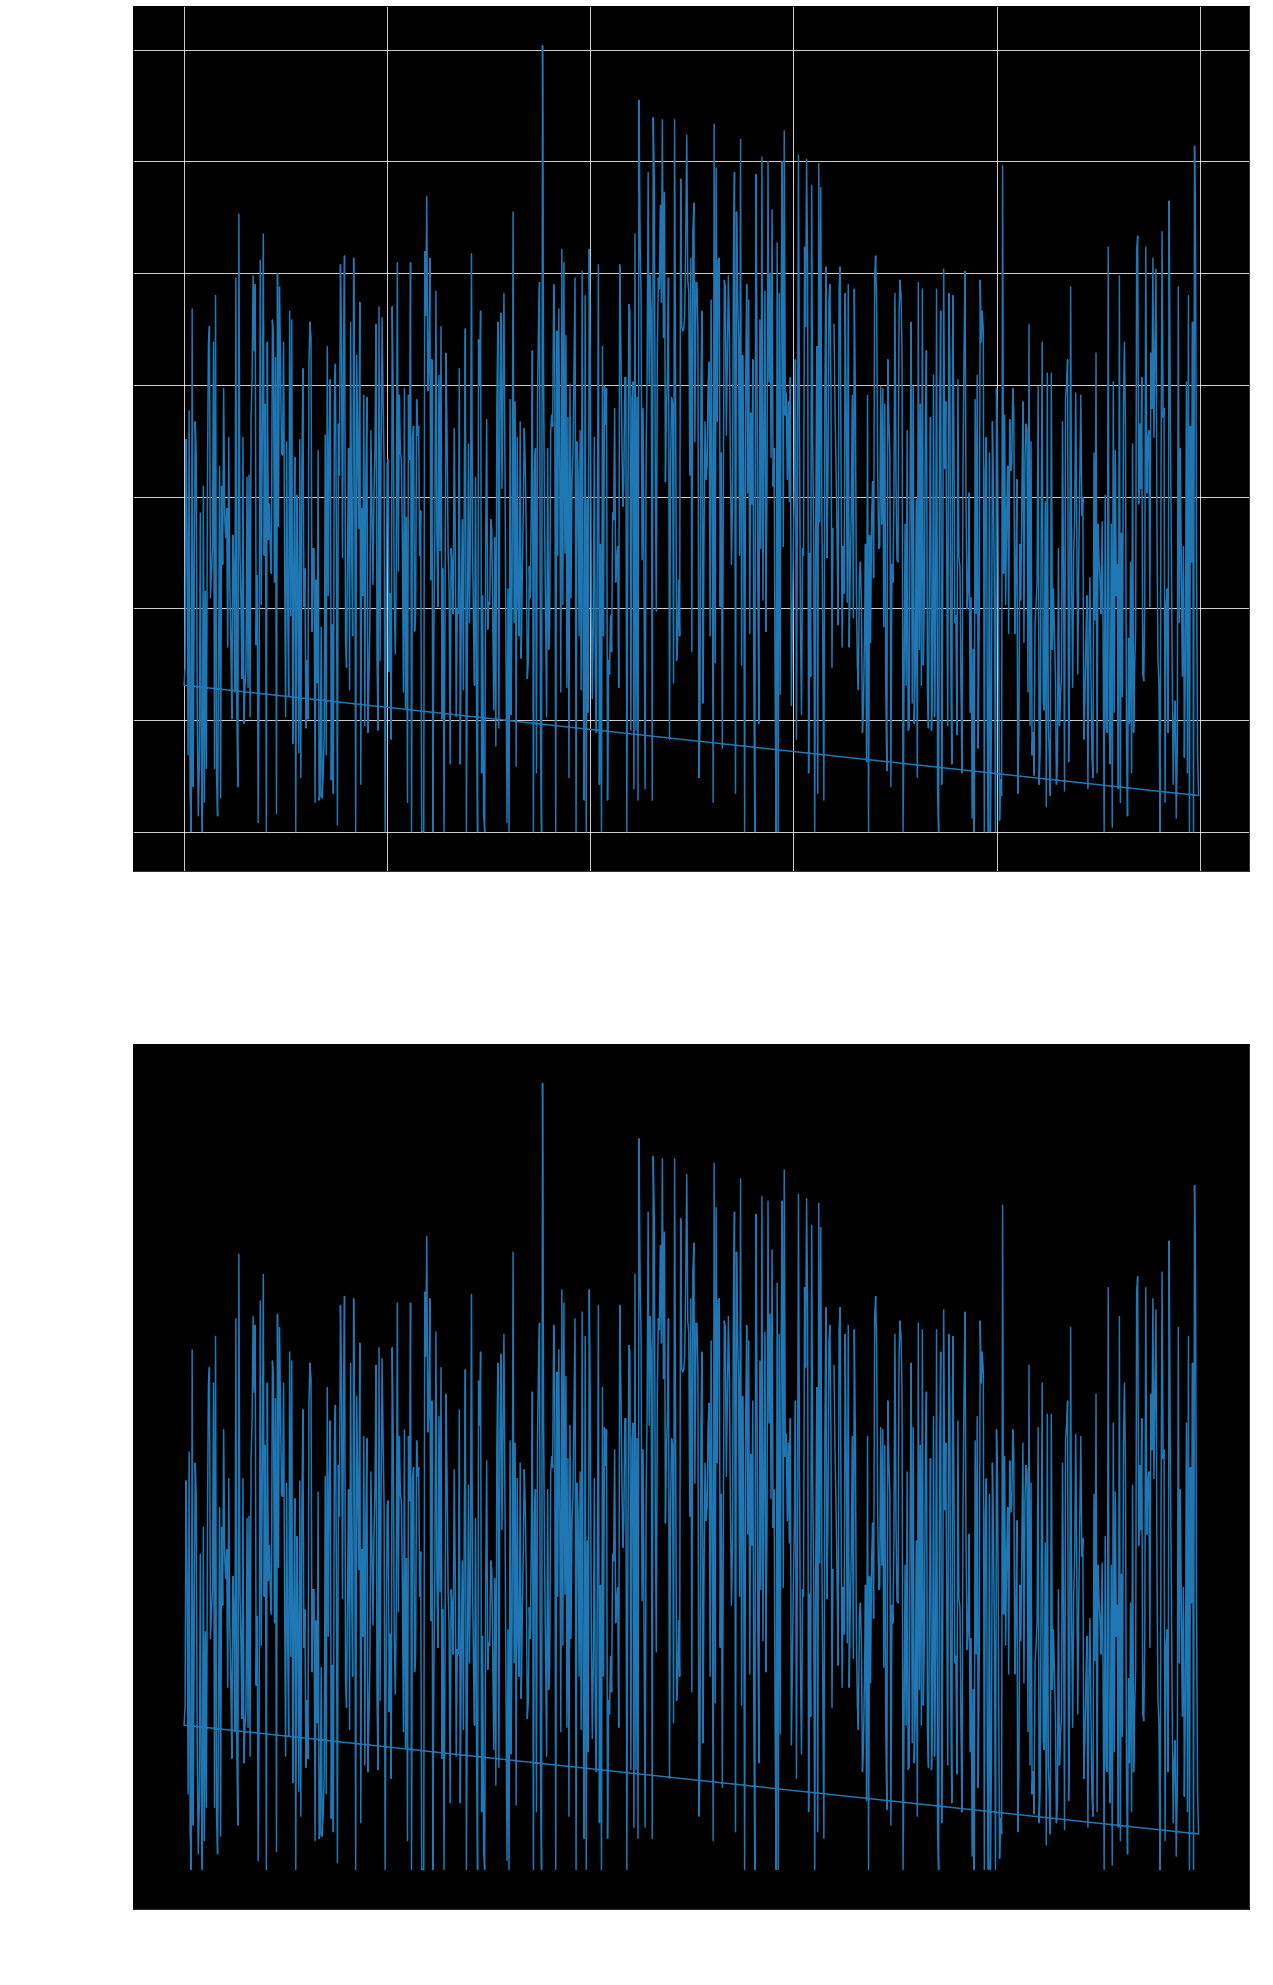

In [110]:
fig = plt.figure(figsize=(20,35))
plt.rcParams.update({'font.size': 30})

fig1 = fig.add_subplot(211)
fig1.set_facecolor('black')
fig1.tick_params(colors='white')
fig1.plot(gas_data.number, gas_data.percent)
plt.grid(color='white')
fig1.set_xlabel('Block number', )
fig1.set_ylabel('Fee percentage')
fig1.xaxis.label.set_color('white')
fig1.yaxis.label.set_color('white')

fig2 = fig.add_subplot(212)
fig2.set_facecolor('black')
fig2.tick_params(colors='white')
fig2.plot(gas_data.number, gas_data.block_fee)
fig2.set_xlabel('Block number', )
fig2.set_ylabel('Fee')
fig2.xaxis.label.set_color('white')
fig2.yaxis.label.set_color('white')

plt.show()

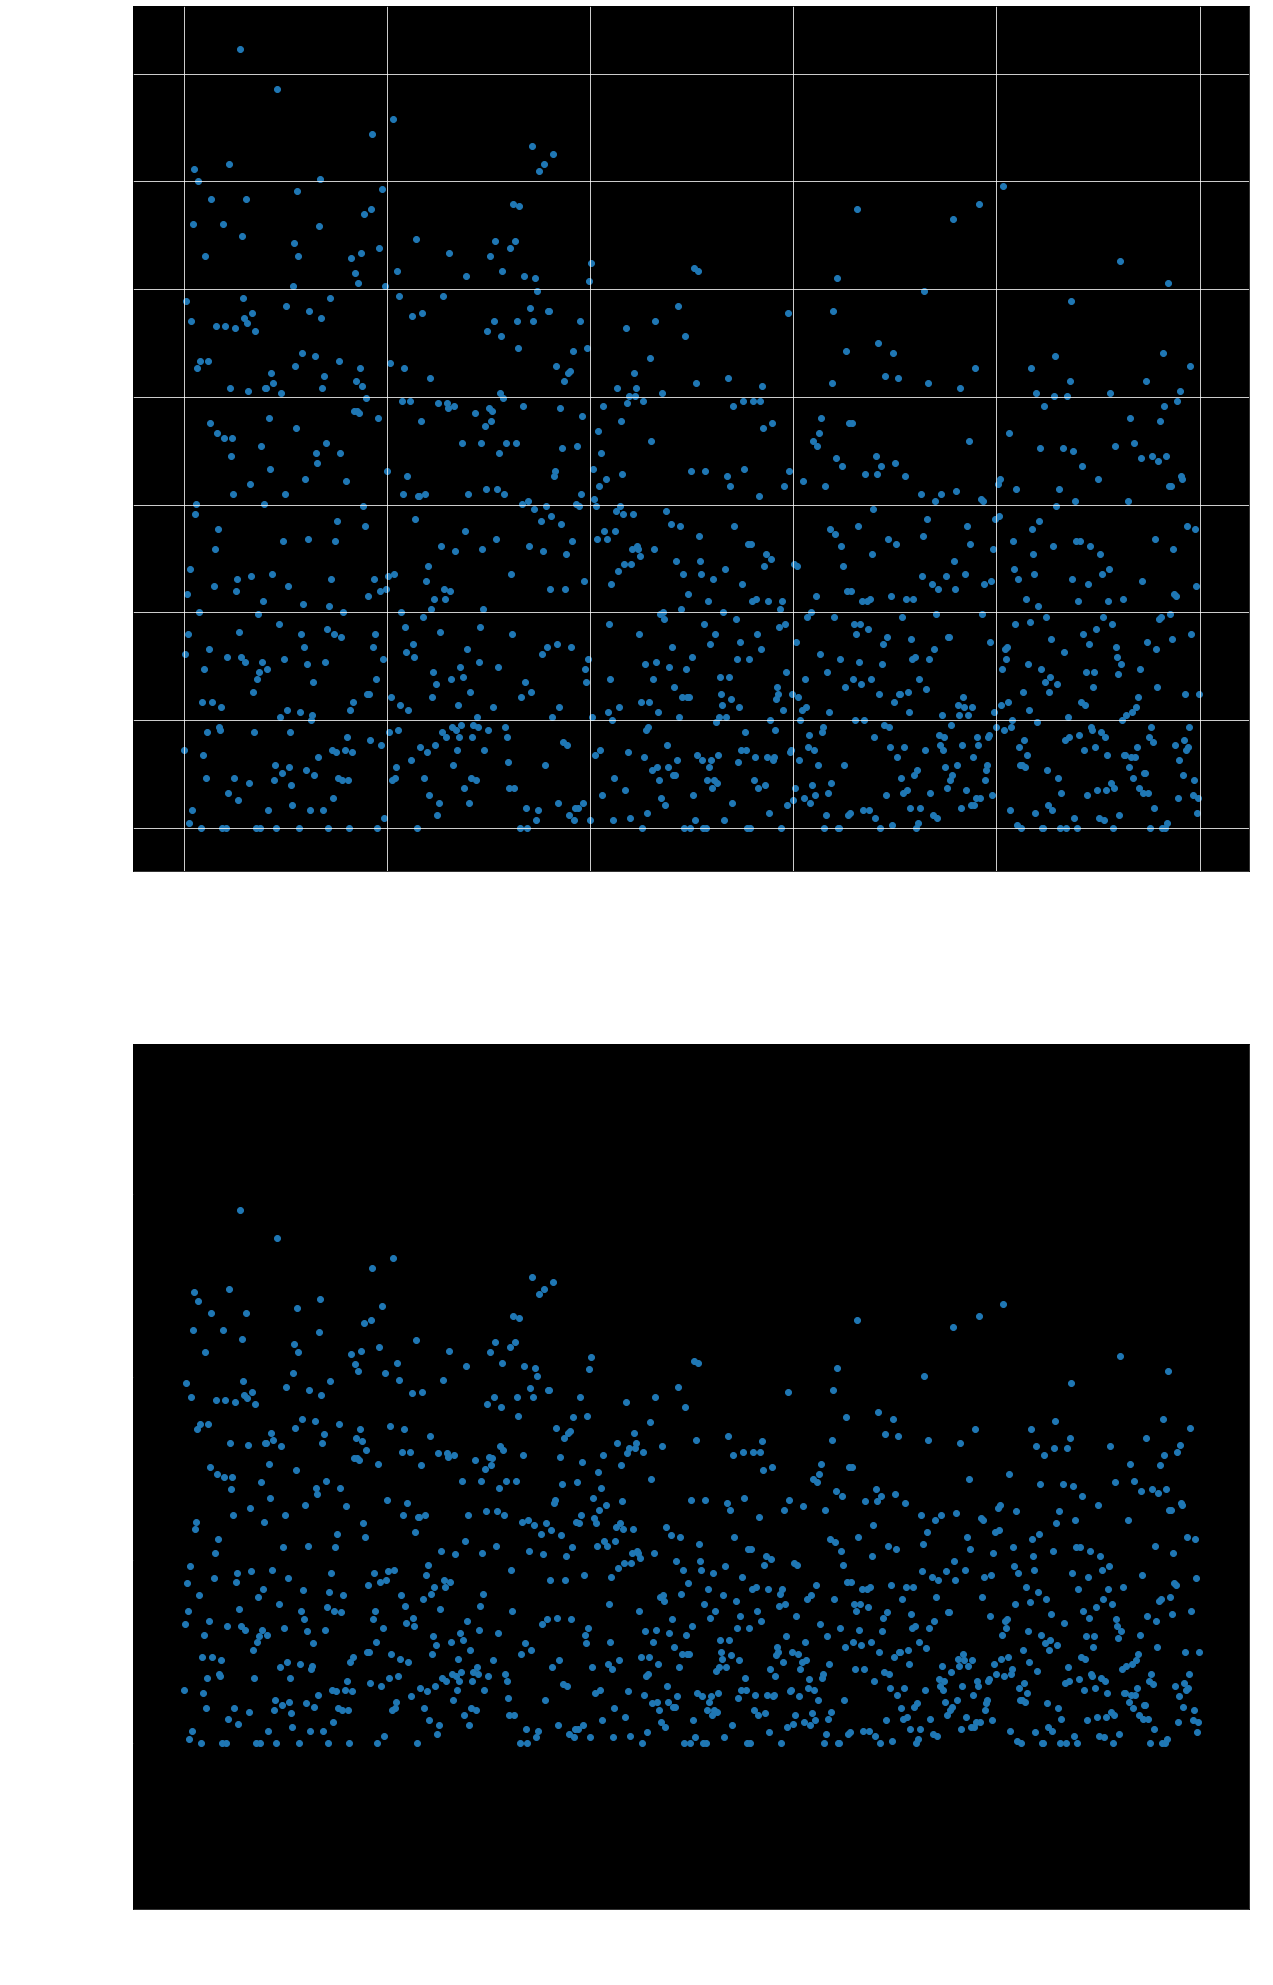

In [40]:
fig = plt.figure(figsize=(20,35))
plt.rcParams.update({'font.size': 30})

fig1 = fig.add_subplot(211)
fig1.set_facecolor('black')
fig1.tick_params(colors='white')
fig1.scatter(gas_data_alt.number, gas_data_alt.percent)
plt.grid(color='white')
fig1.set_xlabel('Block number', )
fig1.set_ylabel('Fee percentage')
fig1.xaxis.label.set_color('white')
fig1.yaxis.label.set_color('white')

fig2 = fig.add_subplot(212)
fig2.set_facecolor('black')
fig2.tick_params(colors='white')
fig2.scatter(gas_data_alt.number, gas_data_alt.block_fee)
fig2.set_xlabel('Block number', )
fig2.set_ylabel('Fee')
fig2.xaxis.label.set_color('white')
fig2.yaxis.label.set_color('white')

plt.show()

### 6. Getting our extra values
#### Expected value, dispersion, median, range, std deviation, 

In [45]:
mean = np.mean(gas_data_alt.block_fee)
dispersion = np.var(gas_data_alt.block_fee)
std_deviation = np.std(gas_data_alt.block_fee)
fee_range = np.ptp(gas_data_alt.block_fee)
med = np.median(gas_data_alt.block_fee)
print ('Expected value:', round(mean, 6))
print ('Dispersion:', round(dispersion, 9))
print ('Standard deciation:', round(std_deviation, 6))
print ('Range:', round(fee_range, 6))
print ('Median:', round(med, 6))

Expected value: 0.004254
Dispersion: 1.0149e-05
Standard deciation: 0.003186
Range: 0.014555
Median: 0.003604


/home/jarvis/anaconda3/envs/slytherin/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
